In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sys

sys.path.append('./../../')

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

#Own Library modules
import src.pca

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

from src.pca import PCA_from_sklearn

C:\Users\Elizabeth\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import pandas.util.testing as tm

In [3]:
df = pd.read_csv('../../data/datos_limpios.csv', encoding = "L1")

In [4]:
cpa_reg = pd.read_csv('../../results/data_results/componentes_principales_regress.csv')

In [5]:
cpa_reg.head() ###Componentes principales de todas las secciones 

,sec_1_cp_1,sec_1_cp_2,sec_1_cp_3,sec_2_cp_1,sec_2_cp_2,sec_2_cp_3,sec_3_cp_1,sec_3_cp_2,sec_4_cp_1,sec_4_cp_2,...,sec_9_cp_1,sec_9_cp_2,sec_9_cp_3,sec_10_1_cp_1,sec_10_1_cp_2,sec_10_1_cp_3,sec_10_2_cp_1,sec_10_2_cp_2,sec_10_2_cp_3,sec_10_2_cp_4
0,-0.821715,-0.066756,-0.106842,-1.544900,0.025678,0.000465,-2.751152,1.038033,-0.593721,1.570301,...,-1.007938,1.674925,2.033414,-1.310197,-1.086806,0.027878,-0.472417,-0.307271,-2.021332,1.726780
1,-0.856175,-0.408062,0.096823,-1.544900,0.025678,0.000465,1.439305,-0.274336,-0.678143,0.180167,...,0.301634,-1.639380,0.733296,-0.761518,1.965701,-0.450662,1.520469,0.580579,-2.225639,0.677854
2,-0.921727,-0.353333,0.020105,3.215723,-2.008007,-1.164138,-0.075647,-1.163561,1.090394,-0.054025,...,2.382538,-1.359657,-1.159584,-1.204937,-0.170071,-0.351054,1.061461,-0.697975,-0.824011,-0.564084
3,-0.856175,-0.408062,0.096823,-1.544900,0.025678,0.000465,-2.054591,0.706529,-0.710868,3.044078,...,-0.223632,0.026949,-0.358396,-0.894177,1.179568,1.859064,-0.579596,-2.437395,2.029714,-0.976424
4,-0.856175,-0.408062,0.096823,-1.544900,0.025678,0.000465,-0.592569,1.411202,1.208648,1.137097,...,-0.219535,-1.224178,-0.397484,0.792073,0.234584,-0.519467,1.607332,-0.691650,-0.699982,-0.110107


In [6]:
cpa_reg.describe()

,sec_1_cp_1,sec_1_cp_2,sec_1_cp_3,sec_2_cp_1,sec_2_cp_2,sec_2_cp_3,sec_3_cp_1,sec_3_cp_2,sec_4_cp_1,sec_4_cp_2,...,sec_9_cp_1,sec_9_cp_2,sec_9_cp_3,sec_10_1_cp_1,sec_10_1_cp_2,sec_10_1_cp_3,sec_10_2_cp_1,sec_10_2_cp_2,sec_10_2_cp_3,sec_10_2_cp_4
count,5.606260e+05,5.606260e+05,5.606260e+05,5.606260e+05,5.606260e+05,5.606260e+05,5.606260e+05,5.606260e+05,5.606260e+05,5.606260e+05,...,5.606260e+05,5.606260e+05,5.606260e+05,5.606260e+05,5.606260e+05,5.606260e+05,5.606260e+05,5.606260e+05,5.606260e+05,5.606260e+05
mean,5.328058e-14,-1.618466e-14,5.677942e-14,-1.714096e-14,-2.459830e-14,1.799664e-14,-1.608830e-14,-2.573978e-15,-6.939575e-17,-2.385724e-16,...,5.388161e-15,-5.453636e-15,-1.746697e-15,-7.494721e-16,-3.008099e-15,6.227401e-16,-3.143143e-15,-5.893955e-15,-8.021108e-16,2.040080e-15
std,1.819019e+00,1.402879e+00,1.322068e+00,1.993253e+00,1.068612e+00,1.048060e+00,1.576344e+00,1.044936e+00,2.533372e+00,2.106282e+00,...,2.371221e+00,1.809497e+00,1.556067e+00,1.548067e+00,1.332025e+00,1.094759e+00,2.073546e+00,1.170186e+00,1.059653e+00,1.011326e+00
min,-1.021739e+00,-1.278528e+00,-3.088088e+00,-1.544900e+00,-2.274686e+00,-1.861291e+00,-3.562895e+00,-2.066039e+00,-6.891618e+00,-8.688445e+00,...,-3.633650e+00,-7.138594e+00,-9.107695e+00,-3.457613e+00,-3.746410e+00,-2.476860e+00,-5.075952e+00,-4.268864e+00,-3.744926e+00,-4.730047e+00
25%,-8.717210e-01,-4.080618e-01,-4.336863e-02,-1.544900e+00,2.567793e-02,4.654036e-04,-1.138788e+00,-7.400212e-01,-1.794955e+00,-1.450111e+00,...,-1.710498e+00,-9.948805e-01,-8.702633e-01,-1.155023e+00,-9.897125e-01,-7.091823e-01,-1.544277e+00,-8.296921e-01,-7.042784e-01,-6.338789e-01
50%,-8.561752e-01,-2.647735e-01,2.010459e-02,-1.544900e+00,2.567793e-02,4.654036e-04,-8.838513e-02,-8.133057e-02,-1.191471e-01,-1.207499e-02,...,-5.238986e-01,-1.114675e-01,-4.890646e-02,-1.630554e-01,-1.700714e-01,-2.377232e-01,-1.259882e-01,-8.535548e-02,-3.488615e-02,2.913024e-02
75%,-7.061573e-01,-2.100445e-01,3.334971e-02,2.215407e+00,4.295478e-02,4.654036e-04,9.814032e-01,7.065291e-01,1.661311e+00,1.385273e+00,...,1.126945e+00,9.018429e-01,9.494105e-01,1.010578e+00,8.646446e-01,4.129933e-01,1.374827e+00,7.329491e-01,6.783288e-01,6.795632e-01
max,5.505685e+00,7.189211e+00,6.810481e+00,3.967850e+00,2.394052e+00,3.710921e+00,5.545087e+00,6.073749e+00,1.341376e+01,1.098755e+01,...,1.480162e+01,9.450945e+00,9.142512e+00,5.860262e+00,5.477970e+00,4.623180e+00,6.616996e+00,8.069240e+00,6.276228e+00,6.197803e+00


#### Regresión Lineal usando la variable hmat

In [7]:
hmat = df['hmat'] ###Variable dependiente o de respuesta

In [8]:
hmat.value_counts(dropna=False)

-0.81255    28826
-0.90552    28355
-0.72212    27861
-0.63382    27144
-1.00146    26945
            ...  
 3.26010        4
-4.33125        4
-5.52843        3
 4.46448        2
 2.77086        1
Name: hmat, Length: 110, dtype: int64

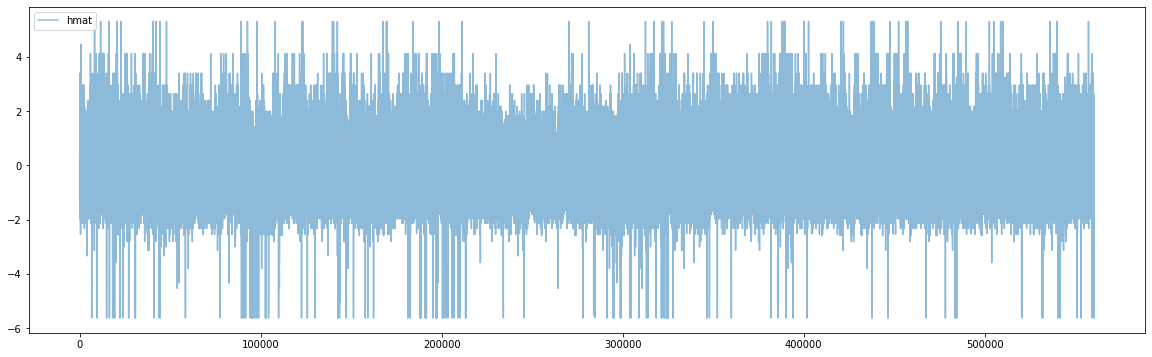

In [9]:
df[['hmat']].plot(alpha=0.5,figsize=(20,6))

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
model = LinearRegression(fit_intercept=True)
model.fit(cpa_reg,hmat)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
df['predicted'] = model.predict(cpa_reg)

In [13]:
df['predicted'].value_counts(dropna=False)

-0.379421    4
-0.399176    4
-0.292055    2
-0.336047    2
-0.022054    2
            ..
-0.278850    1
 0.318833    1
-0.581802    1
-0.172262    1
-0.374188    1
Name: predicted, Length: 560601, dtype: int64

In [14]:
# Cross-validation
df['y_cv_mat'] = cross_val_predict(model, cpa_reg, hmat, cv=10)

In [15]:
r2_score(hmat, df['predicted']) #Regresa el coeficiente de determinación de la R^2 de predicción

0.22717742639318383

In [16]:
r2_score(hmat, df['y_cv_mat']) #Regresa el coeficiente de determinación de la R^2 usando cross-validation

0.21991739797312027

In [17]:
mean_squared_error(hmat, df['predicted']) ##Error cuadrático medio de la predicción

0.5868586720372392

In [18]:
mean_squared_error(hmat, df['y_cv_mat']) ###Error cuadrático medio usando validación cruzada

0.5923717235228688

In [19]:
print(model.intercept_)
print(model.coef_)

-0.2981667400013557
[-0.01190272 -0.01887814  0.00219741  0.01254278 -0.0048143   0.01765431
  0.01901522 -0.00601373 -0.01061144 -0.00850038  0.06276586  0.03093015
 -0.01969719 -0.03043807  0.02631438 -0.05141571  0.03155708 -0.04235083
  0.03779334  0.01534616  0.00566658  0.04411827  0.0417062  -0.12130095
 -0.02039089  0.01750791  0.02276475 -0.00084806  0.04654403 -0.01104434
 -0.11540696 -0.01012403 -0.03269764 -0.0650931  -0.02840306 -0.01232377
 -0.00057322  0.00447464 -0.02101434 -0.03734835 -0.00792522  0.02406489
  0.02865038 -0.00359002  0.00551921  0.00774705  0.02249838  0.0471961
 -0.01353739 -0.01005636  0.0332297   0.00415977 -0.00482654]


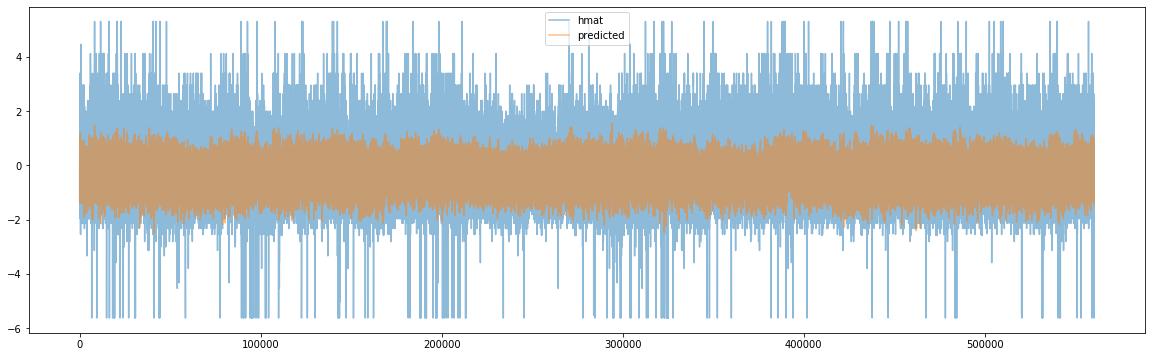

In [20]:
df[['hmat', 'predicted']].plot(alpha=0.5,figsize=(20,6))

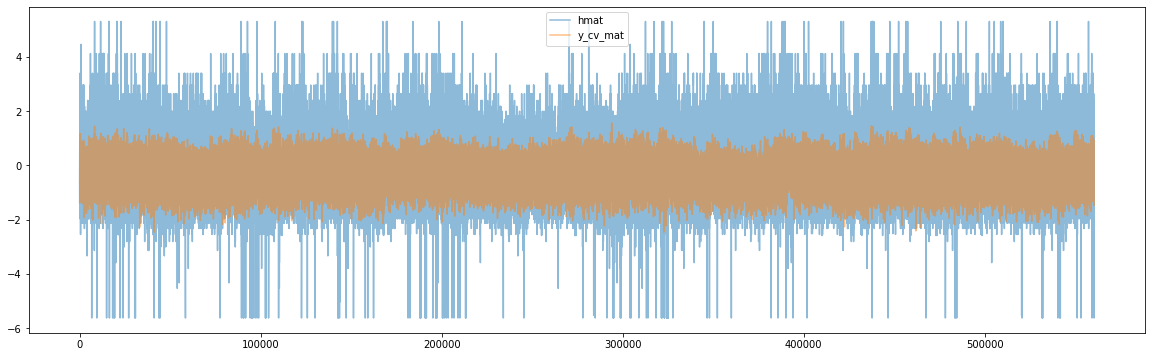

In [21]:
df[['hmat', 'y_cv_mat']].plot(alpha=0.5,figsize=(20,6))

#### Regresión Lineal usando la variable hlec

In [22]:
hlec = df['hlec'] ###Variable dependiente o de respuesta

In [23]:
model = LinearRegression(fit_intercept=True)
model.fit(cpa_reg,hlec)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
df['predicted'] = model.predict(cpa_reg)

In [25]:
df['predicted'].value_counts(dropna=False)

 0.268015    4
 0.213114    4
 0.041846    2
 0.374882    2
-0.003860    2
            ..
 0.736358    1
 0.075484    1
 0.662927    1
 0.546760    1
-0.442621    1
Name: predicted, Length: 560601, dtype: int64

In [26]:
hlec = df['hlec'] ###Variable dependiente o de respuesta

In [27]:
# Cross-validation
df['y_cv_lec'] = cross_val_predict(model, cpa_reg, hlec, cv=10)

In [28]:
r2_score(hlec, df['predicted']) #Regresa el coeficiente de determinación de la R^2 de predicción

0.29492328591155825

In [29]:
r2_score(hlec, df['y_cv_lec']) #Regresa el coeficiente de determinación de la R^2 usando cross-validation

0.2869967903539964

In [30]:
mean_squared_error(hlec, df['predicted']) ##Error cuadrático medio de la predicción

0.49662222439179055

In [31]:
mean_squared_error(hlec, df['y_cv_lec']) ###Error cuadrático medio usando validación cruzada

0.5022052677355454

In [32]:
print(model.intercept_)
print(model.coef_)

0.2980638124168341
[-0.01683887 -0.01679111 -0.00367666 -0.00371108 -0.00683929  0.02048244
  0.00534735 -0.02898815 -0.01601562 -0.03273295  0.03459597  0.01390016
 -0.01013792 -0.04904725  0.00658834 -0.08003056  0.05962165 -0.05755322
  0.06007613  0.01083826 -0.02058272  0.0464183   0.02275333 -0.11650581
 -0.0261106   0.01019679  0.01448819  0.00482977  0.03643772 -0.02751713
 -0.07903117 -0.04213195 -0.00240795 -0.03895899 -0.02321392 -0.01611005
  0.00527629 -0.02206813 -0.00357602 -0.0590956  -0.00634653  0.03289328
  0.00406118 -0.00245072 -0.00109301  0.02032554  0.01952671  0.05241492
 -0.00019341 -0.01099261  0.01990512  0.00672399 -0.01345337]


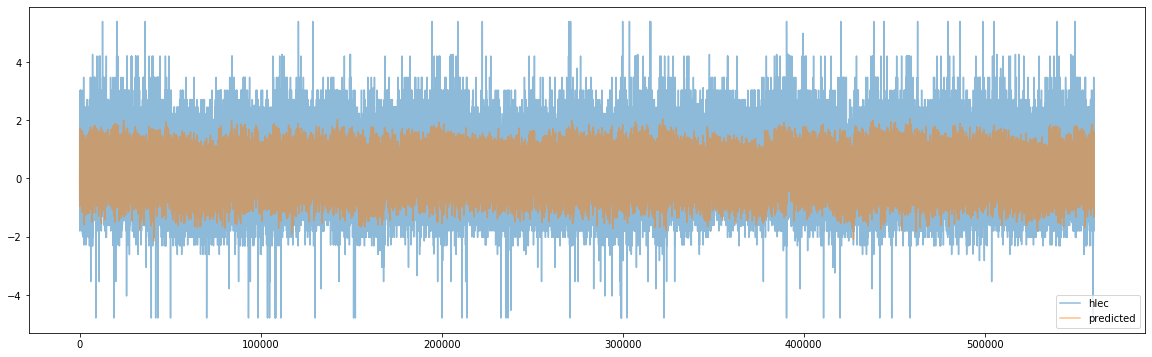

In [33]:
df[['hlec', 'predicted']].plot(alpha=0.5,figsize=(20,6))

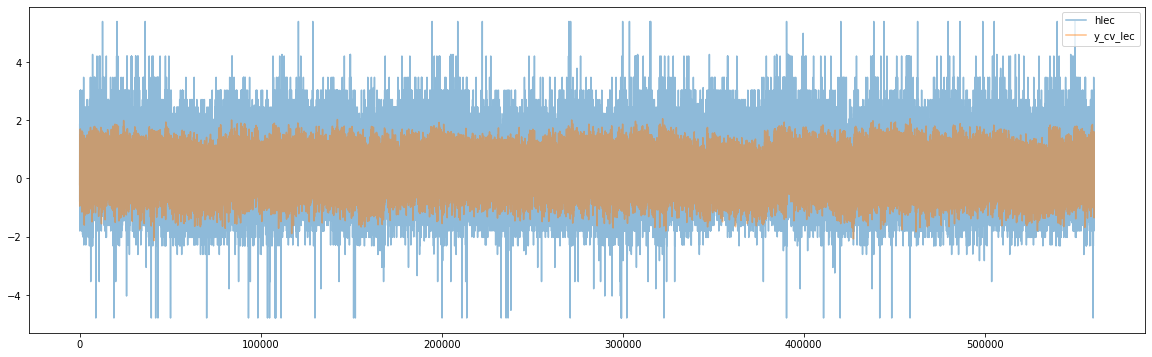

In [34]:
df[['hlec', 'y_cv_lec']].plot(alpha=0.5,figsize=(20,6))

### K - Means

- Se utiliza este algoritmo para el análisis de conglomerados. 

In [35]:
secciones = pd.read_csv('../../results/data_results/secciones.csv') #### Variables independientes o explicativas

In [36]:
secciones.shape ##182 columnas que representan 182 preguntas

(560626, 182)

In [37]:
### Se cargan las funciones
import sklearn as sk
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [38]:
####Se escalan los datos.
scaler = preprocessing.StandardScaler()

secciones_transf = scaler.fit_transform(secciones)

In [39]:
####Se obtienen los atributos que conforman la función componentes_principales 
pca, varianza_explicada, componentesprincipales, val_sing, pca.components_, eigenvalues = PCA_from_sklearn.componentes_principales(secciones_transf)

In [40]:
componentes = pd.DataFrame(pca.components_.T, index=secciones.columns)

In [41]:
####Se eligieron 51 componentes principales, por lo que a continuación se muestran los ejes principales que representan las direcciones de máxima varianza en los datos
componentes

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
p1,0.022862,-0.004443,0.006946,0.038970,0.203431,0.082588,0.003991,-0.002017,0.094480,-0.063037,...,0.029306,0.038845,-0.057165,0.037956,-0.029691,-0.052630,0.053597,-0.002444,0.005159,-0.020902
p2,0.022654,-0.031376,0.010577,0.033361,0.085657,-0.003010,-0.010225,0.023393,0.048647,-0.078342,...,-0.088962,0.071134,-0.008713,0.153424,-0.107199,-0.044720,-0.031048,0.159078,-0.019917,0.088417
p3_A,-0.018898,0.015495,-0.012637,-0.021723,-0.038884,-0.008613,0.021359,-0.055049,-0.072775,0.077313,...,0.005769,0.029286,-0.040516,0.026258,-0.066397,-0.024153,-0.033014,0.037851,-0.007682,0.047719
p3_B,0.015631,-0.014244,0.009249,0.020929,0.030560,0.009831,-0.031594,0.049750,0.065280,-0.080338,...,-0.051167,-0.021316,-0.062558,-0.138745,-0.001269,0.044978,-0.007296,0.103969,-0.091845,0.042860
p3_C,0.009939,-0.002157,0.010293,0.007458,0.025871,-0.000636,0.011045,0.018974,0.033060,-0.012620,...,0.124189,-0.023704,0.288634,0.311162,0.188854,-0.056956,0.114832,-0.398273,0.281185,-0.257136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p150,0.046506,-0.183581,0.026222,0.087230,-0.051306,-0.075408,0.037437,-0.024480,-0.016436,-0.101569,...,0.031535,0.012566,-0.032599,0.021902,0.009101,-0.000630,0.116302,0.015355,0.025634,-0.052265
p151,-0.032276,0.116979,0.000368,-0.079539,0.082518,0.090940,0.043779,-0.002683,-0.046925,0.110473,...,0.074810,0.013199,-0.065810,0.033189,0.096348,0.002952,0.060306,-0.088532,0.024974,-0.068052
p152,-0.060556,0.188038,-0.012388,-0.082108,0.072673,0.080554,0.051739,0.011662,-0.046535,0.087723,...,0.052182,-0.018970,-0.026598,0.020444,0.038061,0.013101,-0.031159,-0.026220,0.010964,-0.000666
p153,-0.042978,0.145868,-0.009289,-0.102637,0.064400,0.105805,-0.014754,-0.022515,-0.072013,0.145614,...,0.049683,-0.004978,-0.074427,0.010934,0.074532,0.014387,0.064467,-0.076968,0.015095,-0.065164


In [42]:
varianza_explicada

array([0.06861742, 0.05235841, 0.03664514, 0.02799373, 0.02348827,
       0.02097524, 0.0193528 , 0.01606884, 0.01479487, 0.01365788,
       0.01295298, 0.01251693, 0.01193779, 0.01178882, 0.01129784,
       0.01040401, 0.01020156, 0.00980334, 0.00937093, 0.00909077,
       0.00884647, 0.00833641, 0.00829811, 0.00809061, 0.00780512,
       0.00746125, 0.0072583 , 0.0069585 , 0.00688668, 0.00686441,
       0.00668339, 0.00646301, 0.00641225, 0.00633612, 0.00628751,
       0.00624047, 0.00612646, 0.00610336, 0.00599388, 0.00594196,
       0.00589024, 0.00579091, 0.00576721, 0.00573727, 0.00569002,
       0.00564933, 0.00557981, 0.00557111, 0.00551833, 0.00551252,
       0.00549963])

In [43]:
eigenvalues

array([12.48839263,  9.52924759,  6.66942697,  5.09486759,  4.27487232,
        3.81750108,  3.52221508,  2.92453378,  2.69267186,  2.48573904,
        2.35744584,  2.27808594,  2.17268108,  2.14556853,  2.0562111 ,
        1.8935335 ,  1.85668662,  1.78421057,  1.70551141,  1.65452331,
        1.61006027,  1.51722985,  1.51025845,  1.47249298,  1.42053357,
        1.35795006,  1.32101233,  1.26644975,  1.25337764,  1.24932402,
        1.21637888,  1.17627069,  1.16703222,  1.15317596,  1.14432815,
        1.13576816,  1.115017  ,  1.11081389,  1.0908884 ,  1.0814381 ,
        1.07202595,  1.05394738,  1.04963346,  1.04418588,  1.03558485,
        1.02818078,  1.01552659,  1.0139444 ,  1.00433725,  1.00328067,
        1.00093423])

- De acuerdo a los criterios de varianza explicada y de eigenvalues mayores a 1, se sugieren 51 componentes principales, lo que significa 51 dimensiones, sin embargo se reducirá a dos dimensiones para utilizar el método de K-Means

In [44]:
####Se eligieron dos componentes principales, por lo que a continuación se muestran los ejes principales que representan las direcciones de máxima varianza en los datos
componentes = componentes.loc[:, [0,1]]
componentes = componentes.rename(columns={'index': 'preguntas', 0:'principal_component_1', 1:'principal_component_2'})
componentes

,principal_component_1,principal_component_2
p1,0.022862,-0.004443
p2,0.022654,-0.031376
p3_A,-0.018898,0.015495
p3_B,0.015631,-0.014244
p3_C,0.009939,-0.002157
...,...,...
p150,0.046506,-0.183581
p151,-0.032276,0.116979
p152,-0.060556,0.188038
p153,-0.042978,0.145868


In [45]:
##Se convierte a valor absoluto el dataframe para poder explicar qué preguntas se asocian a cada componente.
componentes = componentes.abs()

In [46]:
##Ordenamos para obtener las 3 primeras preguntas asociadas al primer componente principal
componentes.sort_values('principal_component_1',ascending=False).head(3) 

,principal_component_1,principal_component_2
p107,0.168460,0.037471
p100,0.161344,0.087089
p99,0.161069,0.087752


Por lo tanto, las preguntas 107, 100 y 99 se asocian más al primer componente principal y que se refieren a lo siguiente:
- p107 ¿Con qué frecuencia tu(s) maestro(s) de matemáticas relaciona(n) tus conocimientos previos con los nuevos?
- p100 ¿Con qué frecuencia tu(s) maestro(s) de matemáticas presenta(n) los temas de manera ordenada?
- p99 ¿Con qué frecuencia tu(s) maestro(s) de matemáticas resuelve(n)  dudas  y preguntas en clase? 

In [47]:
##Ordenamos para obtener las 3 primeras preguntas asociadas al segundo componente principal
componentes.sort_values('principal_component_2',ascending=False).head(3) 

,principal_component_1,principal_component_2
p138,0.066462,0.189885
p152,0.060556,0.188038
p139,0.068197,0.186720


Por lo tanto, las preguntas 138, 152 y 139 se asocian más al segundo componente principal y que se refieren a lo siguiente:
- p138 ¿Cuál es el nivel de estudios alcanzado por tu madre (contesta aunque ya haya fallecido)? 
- p152 Señala cuántas computadoras hay en tu casa.
- p139 ¿Cuál es el nivel de estudios alcanzado por tu padre (contesta aunque ya haya fallecido)? 

In [48]:
##Se obtienen las preguntas que en valor absoluto se asocian más a cada componente.
componentes.idxmax(axis=0)

principal_component_1    p107
principal_component_2    p138
dtype: object

- Se obtienen los componentes principales que son los que se usaran en K-Means.

In [49]:
componentesprincipales = pd.DataFrame(componentesprincipales)
componentesprincipales_secciones = componentesprincipales.loc[:, [0, 1]]

In [50]:
componentesprincipales_secciones = componentesprincipales_secciones.rename(columns={'index': 'preguntas', 0:'principal_component_1', 1:'principal_component_2'})
componentesprincipales_secciones

,principal_component_1,principal_component_2
0,-2.100914,-3.998240
1,2.311979,3.142358
2,1.602422,1.247602
3,5.036082,0.109165
4,0.846103,0.157318
...,...,...
560621,3.611869,-1.515948
560622,1.447360,-2.263239
560623,-0.911722,6.099792
560624,0.918641,4.354072


- Gráfica que muestra los dos componentes principales.

Text(0, 0.5, 'Componente 2')

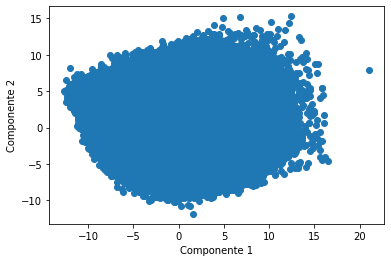

In [51]:
plt.scatter(data=componentesprincipales_secciones, x='principal_component_1', y='principal_component_2')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

- Se obtiene el número de clusters óptimos a partir del punto de corte de la siguiente gráfica, el método que se uso fue el de Elbow. Sin embargo este proceso se tarda mucho y además nos arroja dos puntos de corte (2 y 3), por lo que se decidió paralelizar usando Dask.

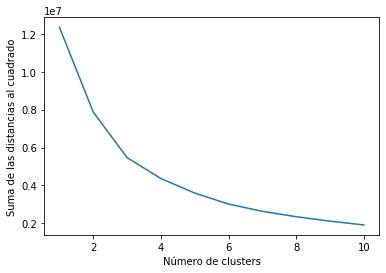

In [52]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(componentesprincipales_secciones)
    wcss.append(kmeans.inertia_)

# Gráfica de la suma de las distancias al cuadrado
plt.plot(range(1, 11), wcss)
plt.xlabel('Número de clusters')
plt.ylabel('Suma de las distancias al cuadrado')
plt.show()

#### Cómputo en paralelo usando Dask

In [53]:
from dask.distributed import Client, progress
import dask_ml.cluster

In [54]:
client = Client()
client

Client Scheduler: tcp://127.0.0.1:59544 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 12 Memory: 17.02 GB


- Al dar click en el dashboard de arriba se muestra la página de status mediante bokeh, en el puerto 8787. A continuación se presenta el apartado de workers:

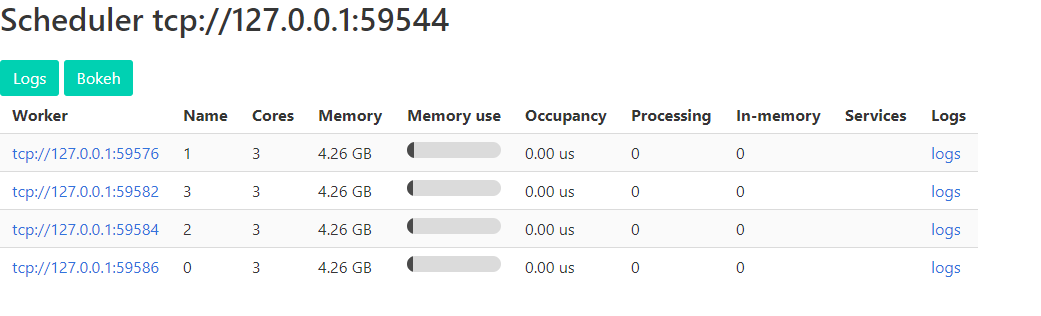

In [58]:
from IPython.display import Image, display
display(Image(filename='../../docs/images/dask_workers.png', embed=True))

- Se obtiene el número de cluster óptimos paralelizando mediante Dask.

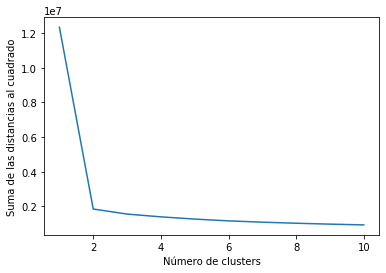

In [55]:
wcss = []
for i in range(1, 11):
    kmeans = dask_ml.cluster.KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(componentesprincipales_secciones)
    wcss.append(kmeans.inertia_)

# Gráfica de la suma de las distancias al cuadrado
plt.plot(range(1, 11), wcss)
plt.xlabel('Número de clusters')
plt.ylabel('Suma de las distancias al cuadrado')
plt.show()

- En la gráfica se observa que el número de clusters óptimos es de 2, así que se usaremos K- Means para dos clusters y también se paraleliza. 

In [56]:
kmeans = dask_ml.cluster.KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
k_means = kmeans.fit(componentesprincipales_secciones)
centers = kmeans.cluster_centers_ ###centroides de los clusters
labels = kmeans.labels_

Text(0, 0.5, 'Componente 2 \n (p138, p152, p139)')

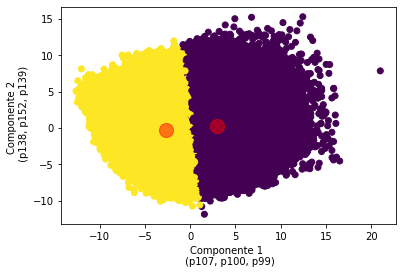

In [57]:
plt.scatter(data=componentesprincipales_secciones, x='principal_component_1', y='principal_component_2', c=labels)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel('Componente 1 \n (p107, p100, p99)')
plt.ylabel('Componente 2 \n (p138, p152, p139)')

##### Referencias:

- Palacios M. Erick, Notas de MNO 2020, [Cómputo en paralelo - Dask](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/II.computo_paralelo/2.2.Python_dask.ipynb)
- Tipología_manejo_agrícola por [Irene Ramos](https://github.com/iramosp/tesis-paisajes/blob/master/Tipologia_manejo_agricola.ipynb)